# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from pandas.io.formats.style_render import DataFrame
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as scipy
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# **Loading data**

In [ ]:
!wget -O "APH.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/APH.csv"
!wget -O "NHH.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/NHH.csv"
!wget -O "TCM.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/TCM.csv"
!wget -O "DIG.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/DIG.csv"
!wget -O "FRT.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/FRT.csv"
!wget -O "VRC.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VRC.csv"
!wget -O "HBC.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/HBC.csv"
!wget -O "OCB.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/OCB.csv"
!wget -O "TCO.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/TCO.csv"
!wget -O "VNI.csv" "https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VNI.csv"

--2022-12-11 16:23:12--  https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/APH.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10152 (9.9K) [text/plain]
Saving to: ‘APH.csv’

APH.csv             100%[===================>]   9.91K  --.-KB/s    in 0s      

2022-12-11 16:23:12 (51.9 MB/s) - ‘APH.csv’ saved [10152/10152]

--2022-12-11 16:23:12--  https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/NHH.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87

In [ ]:
index_list = ["APH", "NHH", "TCM", "DIG", "FRT", "VRC", "HBC", "OCB", "TCO", "VNI"]

# **Read data**

In [ ]:
for index in index_list:
  globals()[index] = pd.read_csv(f'{index}.csv')
  globals()[index] = globals()[index].iloc[::-1]  
  print(globals()[index],'\n')
  print(globals()[index].isnull().sum(), '\n')

           Date      Price       Open       High        Low     Vol. Change %
129  07/01/2021  46,800.00  46,880.00  47,120.00  46,080.00  618.63K   -0.17%
128  07/02/2021  45,600.00  46,640.00  46,800.00  45,520.00  601.00K   -2.56%
127  07/05/2021  44,240.00  45,600.00  45,760.00  43,680.00    1.89M   -2.98%
126  07/06/2021  44,160.00  44,240.00  45,040.00  44,080.00    2.01M   -0.18%
125  07/07/2021  44,160.00  44,160.00  44,800.00  43,360.00    1.93M    0.00%
..          ...        ...        ...        ...        ...      ...      ...
4    12/27/2021  29,840.00  29,440.00  30,360.00  28,800.00   11.15M    1.63%
3    12/28/2021  30,720.00  30,000.00  31,040.00  30,000.00   13.00M    2.95%
2    12/29/2021  30,480.00  30,800.00  31,160.00  30,240.00    6.79M   -0.78%
1    12/30/2021  29,920.00  30,520.00  30,800.00  29,880.00    5.77M   -1.84%
0    12/31/2021  29,720.00  29,920.00  30,360.00  29,600.00    8.81M   -0.67%

[130 rows x 7 columns] 

Date        0
Price       0
Open      

As we can see, each stock has 130 samples and 7 data fields. There is no missing value.

In [ ]:
for index in index_list:
  globals()[index]["Date"] = globals()[index]["Date"].str.replace('/', '').astype(int)
  globals()[index]["Change %"] = globals()[index]["Change %"].str.replace('%', '').astype(float)
  globals()[index]["Price"] = globals()[index]["Price"].str.replace(',', '').astype(float)
  globals()[index]["Open"] = globals()[index]["Open"].str.replace(',', '').astype(float)
  globals()[index]["High"] = globals()[index]["High"].str.replace(',', '').astype(float)
  globals()[index]["Low"] = globals()[index]["Low"].str.replace(',', '').astype(float)
  globals()[index]["Vol."] = globals()[index]["Vol."].str.replace('K', '0')
  globals()[index]["Vol."] = globals()[index]["Vol."].str.replace('M', '0000')
  globals()[index]["Vol."] = globals()[index]["Vol."].str.replace('.', '').astype(float)
  # globals()[index]["Date"] = pd.to_numeric(globals()[index]["Date"])
  # pd.to_numeric(globals()[index]["Date"], errors='raise', downcast=None)
  print(globals()[index], '\n')

         Date    Price     Open     High      Low        Vol.  Change %
129   7012021  46800.0  46880.0  47120.0  46080.0    618630.0     -0.17
128   7022021  45600.0  46640.0  46800.0  45520.0    601000.0     -2.56
127   7052021  44240.0  45600.0  45760.0  43680.0   1890000.0     -2.98
126   7062021  44160.0  44240.0  45040.0  44080.0   2010000.0     -0.18
125   7072021  44160.0  44160.0  44800.0  43360.0   1930000.0      0.00
..        ...      ...      ...      ...      ...         ...       ...
4    12272021  29840.0  29440.0  30360.0  28800.0  11150000.0      1.63
3    12282021  30720.0  30000.0  31040.0  30000.0  13000000.0      2.95
2    12292021  30480.0  30800.0  31160.0  30240.0   6790000.0     -0.78
1    12302021  29920.0  30520.0  30800.0  29880.0   5770000.0     -1.84
0    12312021  29720.0  29920.0  30360.0  29600.0   8810000.0     -0.67

[130 rows x 7 columns] 

         Date    Price     Open     High      Low      Vol.  Change %
129   7012021  44180.0  44571.0  44571.0

After preprocessing data, we use Box plot to check outliers of stocks.

**APH**

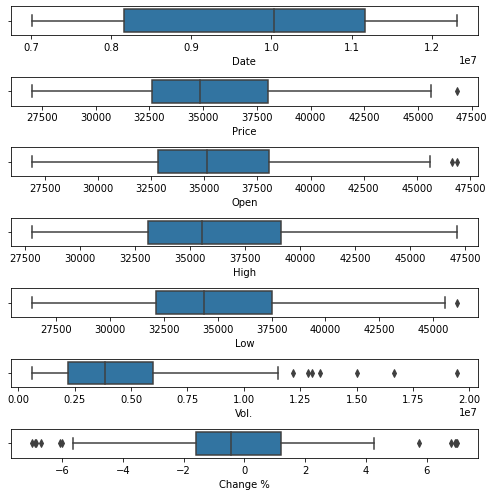

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(APH['Date'], ax = axs[0])
plt2 = sns.boxplot(APH['Price'], ax = axs[1])
plt3 = sns.boxplot(APH['Open'], ax = axs[2])
plt4 = sns.boxplot(APH['High'], ax = axs[3])
plt5 = sns.boxplot(APH['Low'], ax = axs[4])
plt6 = sns.boxplot(APH['Vol.'], ax = axs[5])
plt7 = sns.boxplot(APH['Change %'], ax = axs[6])
plt.tight_layout()

**NHH**

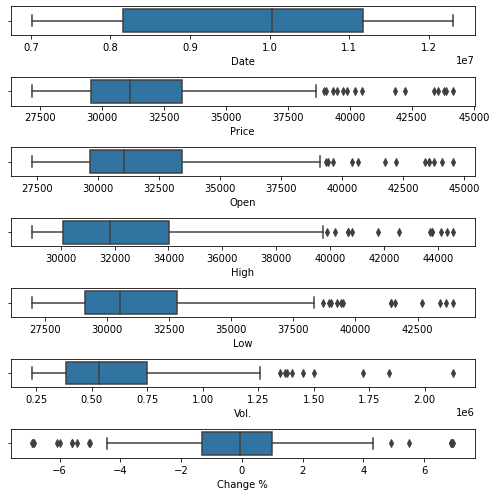

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(NHH['Date'], ax = axs[0])
plt2 = sns.boxplot(NHH['Price'], ax = axs[1])
plt3 = sns.boxplot(NHH['Open'], ax = axs[2])
plt4 = sns.boxplot(NHH['High'], ax = axs[3])
plt5 = sns.boxplot(NHH['Low'], ax = axs[4])
plt6 = sns.boxplot(NHH['Vol.'], ax = axs[5])
plt7 = sns.boxplot(NHH['Change %'], ax = axs[6])
plt.tight_layout()

**TCM**

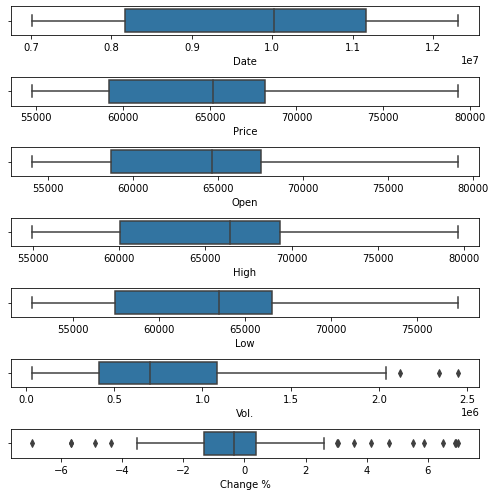

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(TCM['Date'], ax = axs[0])
plt2 = sns.boxplot(TCM['Price'], ax = axs[1])
plt3 = sns.boxplot(TCM['Open'], ax = axs[2])
plt4 = sns.boxplot(TCM['High'], ax = axs[3])
plt5 = sns.boxplot(TCM['Low'], ax = axs[4])
plt6 = sns.boxplot(TCM['Vol.'], ax = axs[5])
plt7 = sns.boxplot(TCM['Change %'], ax = axs[6])
plt.tight_layout()

**DIG**

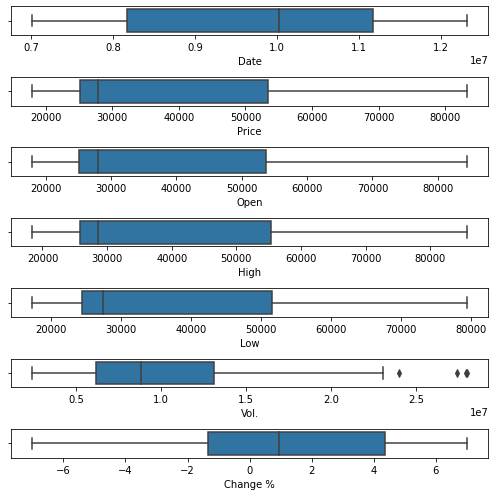

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(DIG['Date'], ax = axs[0])
plt2 = sns.boxplot(DIG['Price'], ax = axs[1])
plt3 = sns.boxplot(DIG['Open'], ax = axs[2])
plt4 = sns.boxplot(DIG['High'], ax = axs[3])
plt5 = sns.boxplot(DIG['Low'], ax = axs[4])
plt6 = sns.boxplot(DIG['Vol.'], ax = axs[5])
plt7 = sns.boxplot(DIG['Change %'], ax = axs[6])
plt.tight_layout()

**FRT**

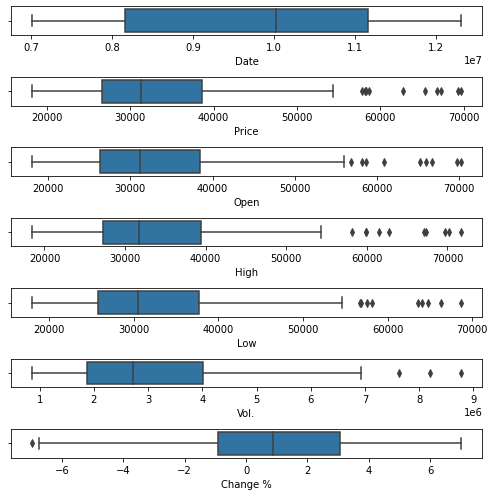

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(FRT['Date'], ax = axs[0])
plt2 = sns.boxplot(FRT['Price'], ax = axs[1])
plt3 = sns.boxplot(FRT['Open'], ax = axs[2])
plt4 = sns.boxplot(FRT['High'], ax = axs[3])
plt5 = sns.boxplot(FRT['Low'], ax = axs[4])
plt6 = sns.boxplot(FRT['Vol.'], ax = axs[5])
plt7 = sns.boxplot(FRT['Change %'], ax = axs[6])
plt.tight_layout()

**VRC**

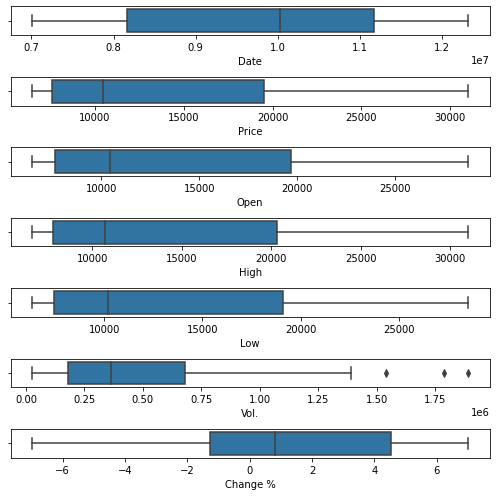

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(VRC['Date'], ax = axs[0])
plt2 = sns.boxplot(VRC['Price'], ax = axs[1])
plt3 = sns.boxplot(VRC['Open'], ax = axs[2])
plt4 = sns.boxplot(VRC['High'], ax = axs[3])
plt5 = sns.boxplot(VRC['Low'], ax = axs[4])
plt6 = sns.boxplot(VRC['Vol.'], ax = axs[5])
plt7 = sns.boxplot(VRC['Change %'], ax = axs[6])
plt.tight_layout()

**HBC**

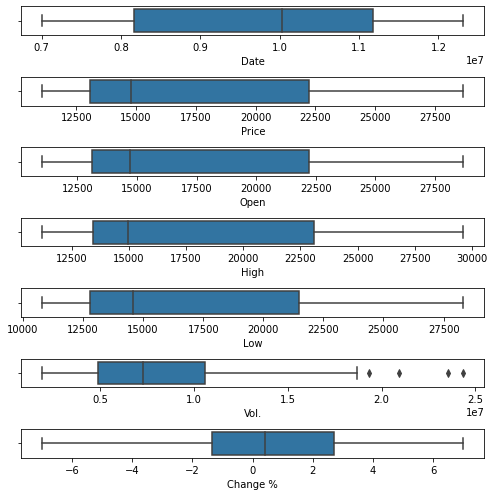

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(HBC['Date'], ax = axs[0])
plt2 = sns.boxplot(HBC['Price'], ax = axs[1])
plt3 = sns.boxplot(HBC['Open'], ax = axs[2])
plt4 = sns.boxplot(HBC['High'], ax = axs[3])
plt5 = sns.boxplot(HBC['Low'], ax = axs[4])
plt6 = sns.boxplot(HBC['Vol.'], ax = axs[5])
plt7 = sns.boxplot(HBC['Change %'], ax = axs[6])
plt.tight_layout()

**OCB**

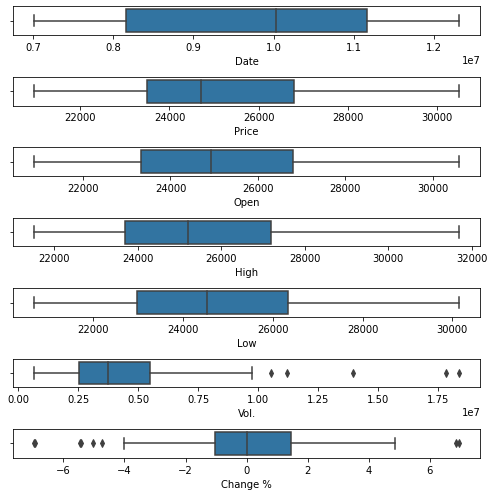

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(OCB['Date'], ax = axs[0])
plt2 = sns.boxplot(OCB['Price'], ax = axs[1])
plt3 = sns.boxplot(OCB['Open'], ax = axs[2])
plt4 = sns.boxplot(OCB['High'], ax = axs[3])
plt5 = sns.boxplot(OCB['Low'], ax = axs[4])
plt6 = sns.boxplot(OCB['Vol.'], ax = axs[5])
plt7 = sns.boxplot(OCB['Change %'], ax = axs[6])
plt.tight_layout()

**TCO**

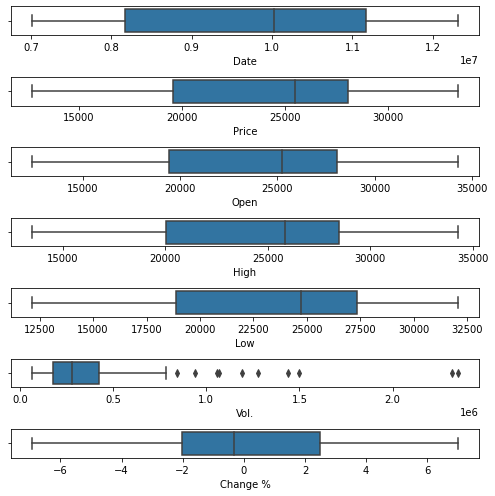

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(TCO['Date'], ax = axs[0])
plt2 = sns.boxplot(TCO['Price'], ax = axs[1])
plt3 = sns.boxplot(TCO['Open'], ax = axs[2])
plt4 = sns.boxplot(TCO['High'], ax = axs[3])
plt5 = sns.boxplot(TCO['Low'], ax = axs[4])
plt6 = sns.boxplot(TCO['Vol.'], ax = axs[5])
plt7 = sns.boxplot(TCO['Change %'], ax = axs[6])
plt.tight_layout()

**VNI**

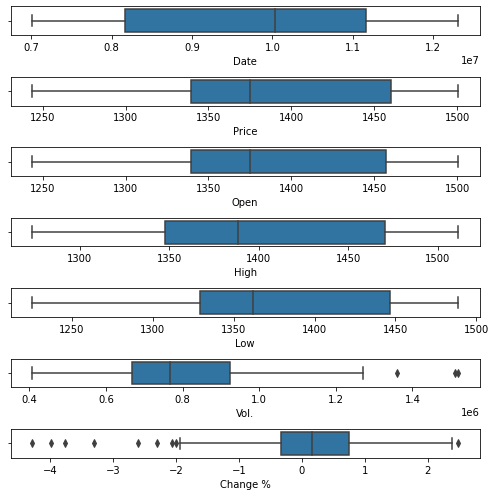

In [ ]:
fig, axs = plt.subplots(7, figsize = (7, 7))
plt1 = sns.boxplot(VNI['Date'], ax = axs[0])
plt2 = sns.boxplot(VNI['Price'], ax = axs[1])
plt3 = sns.boxplot(VNI['Open'], ax = axs[2])
plt4 = sns.boxplot(VNI['High'], ax = axs[3])
plt5 = sns.boxplot(VNI['Low'], ax = axs[4])
plt6 = sns.boxplot(VNI['Vol.'], ax = axs[5])
plt7 = sns.boxplot(VNI['Change %'], ax = axs[6])
plt.tight_layout()

There are many outliers, especially in 2 columns "Vol." and "Change%".

# **Exploratory Data Analysis**

We load the data again and preprocess them, but this time just read the "Date" and "Price" columns.

In [ ]:
for index in index_list:
  globals()[index] = pd.read_csv(f'{index}.csv', parse_dates=['Date'], index_col='Date').filter(['Price'])
  globals()[index] = globals()[index].iloc[::-1]  
  print(globals()[index],'\n')

                Price
Date                 
2021-07-01  46,800.00
2021-07-02  45,600.00
2021-07-05  44,240.00
2021-07-06  44,160.00
2021-07-07  44,160.00
...               ...
2021-12-27  29,840.00
2021-12-28  30,720.00
2021-12-29  30,480.00
2021-12-30  29,920.00
2021-12-31  29,720.00

[130 rows x 1 columns] 

             Price
Date              
2021-07-01  44,180
2021-07-02  43,868
2021-07-05  43,399
2021-07-06  43,789
2021-07-07  43,555
...            ...
2021-12-27  29,011
2021-12-28  30,027
2021-12-29  30,027
2021-12-30  30,496
2021-12-31  31,278

[130 rows x 1 columns] 

               Price
Date                
2021-07-01  77,652.0
2021-07-02  78,696.0
2021-07-05  79,130.0
2021-07-06  77,130.0
2021-07-07  79,130.0
...              ...
2021-12-27  59,130.0
2021-12-28  58,174.0
2021-12-29  57,826.0
2021-12-30  57,391.0
2021-12-31  56,696.0

[130 rows x 1 columns] 

               Price
Date                
2021-07-01  21,270.5
2021-07-02  20,901.6
2021-07-05  20,409.8
2021-07-06 

In [ ]:
for index in index_list:
  globals()[index]["Price"] = globals()[index]["Price"].str.replace(',', '').astype(float)

*   We use line chart to have an overview about the movement of stocks.
*   Because there are so many well-known distributions, we estimate distribution of stocks by the shape of KDE and use Q-Q plot to test.




## **Drop stocks**

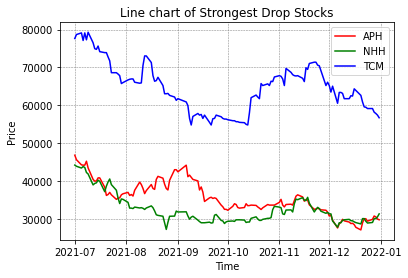

In [ ]:
plt.title("Line chart of Strongest Drop Stocks")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.plot(APH['Price'], color = 'red', label = 'APH')
plt.plot(NHH['Price'], color = 'green', label = 'NHH')
plt.plot(TCM['Price'], color = 'blue', label = 'TCM')
plt.legend()
plt.show()

It can be clearly seen from the chart that though there is several fluctuations throughout the period, all three stocks witnessed a significant downtrend. Especially, the TCM stock index had the most slump.

**APH**

Text(0.5, 1.0, 'The histogram and KDE of APH')

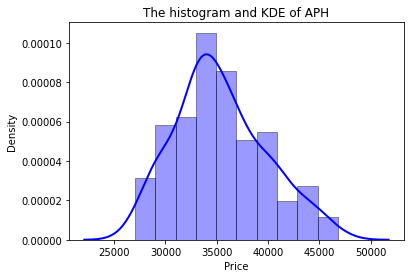

In [ ]:
sns.distplot(APH['Price'], 
             hist = True, 
             kde = True,
            #  rug = True,
            #  fit = stats.expon,
            #  fit = stats.gamma,
            #  fit = stats.exponnorm,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of APH")

The histogram and Kernel Density Estimation (KDE) line above illustrates the density (or frequency) of price index from APH stock. The KDE line turns out to have a shape of bell curve so it may follow normal or gamma distribution. We are using Q-Q plots to clarify below.

In [ ]:
# # %pip install pingouin
# import pingouin as pg
# pg.normality(APH['Price'])
# # scipy.stats.shapiro(APH)

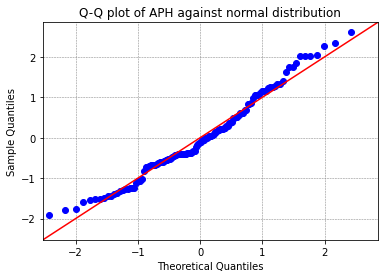

In [ ]:
sm.qqplot(APH['Price'], line = '45', fit = True)
plt.title("Q-Q plot of APH against normal distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

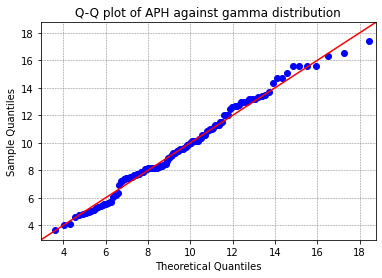

In [ ]:
sm.qqplot(APH['Price'], line = '45', fit = True, dist=stats.gamma)
plt.title("Q-Q plot of APH against gamma distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

After graphing two QQ-plots of APH stock index which respectively follow normal distribution and gamma distribution, we can marginally see that APH is fitting more to the later.

**NHH**

Text(0.5, 1.0, 'The histogram and KDE of NHH')

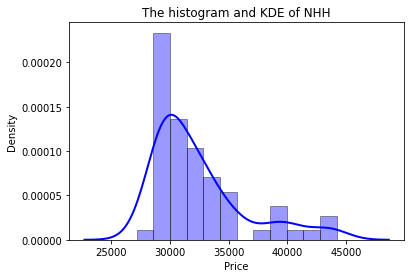

In [ ]:
sns.distplot(NHH['Price'], 
             hist = True, 
             kde = True,
            #  fit = stats.gamma,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of NHH")

Similarly for NHH stock, we draw the same histogram combined with KDE to consider its distribution. This time, there seems to be of two minds between gamma distribution or exponential distribution. Therefore, Q-Q plots are also needed.

In [ ]:
# pg.normality(NHH['Price'])

In [ ]:
# # from scipy.stats import kstest
# # kstest(NHH, 'poisson', args=(10,10000))
# sm.qqplot(NHH['Price'], line='45', fit = True, dist=stats.norm)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

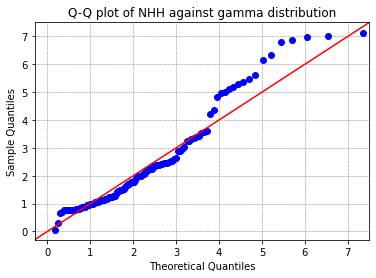

In [ ]:
sm.qqplot(NHH['Price'], line='45', fit = True, dist=stats.gamma)
plt.title("Q-Q plot of NHH against gamma distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

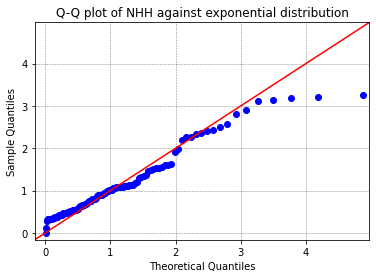

In [ ]:
sm.qqplot(NHH['Price'], line='45', fit = True, dist=stats.expon)
plt.title("Q-Q plot of NHH against exponential distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

Despite the incompletely follow of NHH stock index to any distribution illustrated above, it may be the best fitted to exponential distribution (for first half of x-axis as shown).

**TCM**

Text(0.5, 1.0, 'The histogram and KDE of TCM')

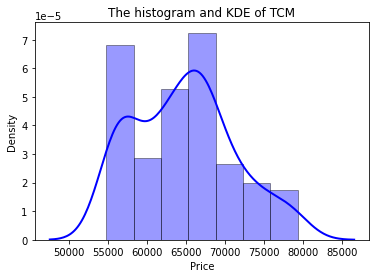

In [ ]:
sns.distplot(TCM['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of TCM")

Applying the same method to TCM stock, in this case, it can be clearly seen that the KDE line doesn't have any speacial shape. In other words, this stock doesn't follow any well-known distribution.

In [ ]:
# pg.normality(TCM['Price'])

In [ ]:
# sm.qqplot(TCM['Price'], line='45', fit = True)
# plt.show()

## **Growth Stocks**

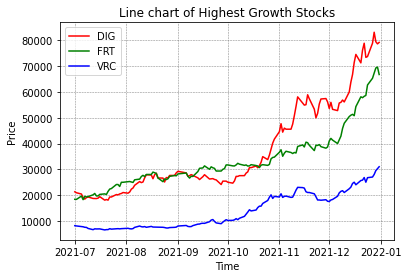

In [ ]:
plt.title("Line chart of Highest Growth Stocks")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.plot(DIG['Price'], color = 'red', label = 'DIG')
plt.plot(FRT['Price'], color = 'green', label = 'FRT')
plt.plot(VRC['Price'], color = 'blue', label = 'VRC')
plt.legend()
plt.show()

The line chart above illustrates indexs of DIG, FRT, VRC stock within the lines colored red, green, blue respectively in the period between 07/2021 and 12/2021. Overally, all three indexes witnessed a dramatic growth where DIG skyrocketed the most and VRC increased the least on the other hand.

**DIG**

Text(0.5, 1.0, 'The histogram and KDE of DIG')

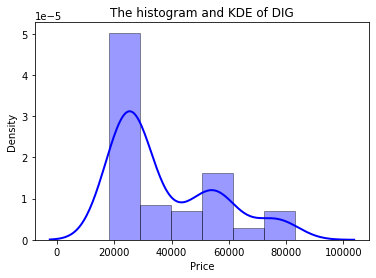

In [ ]:
sns.distplot(DIG['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of DIG")

In this case, it can be clearly seen that the KDE line from this plot doesn't have any speacial shape which means DIG stock's index doesn't follow any well-known distribution.

In [ ]:
# pg.normality(DIG['Price'])

In [ ]:
# sm.qqplot(DIG['Price'], line='45', fit = True)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

In [ ]:
# sm.qqplot(DIG['Price'], line='45', fit = True, dist = stats.gamma)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

In [ ]:
# sm.qqplot(DIG['Price'], line='45', fit = True, dist = stats.expon)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

**FRT**

Text(0.5, 1.0, 'The histogram and KDE of FRT')

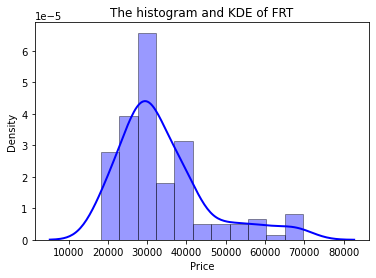

In [ ]:
sns.distplot(FRT['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of FRT")

Unlike DIG's, after graphing the histogram within KDE line of FRT stock, we can see that it may be in the form of gamma distribution or exponential distribution. Let's use Q-Q plots to figure out.

In [ ]:
# pg.normality(FRT['Price'])

In [ ]:
# sm.qqplot(FRT['Price'], line='45', fit = True)
# plt.show()

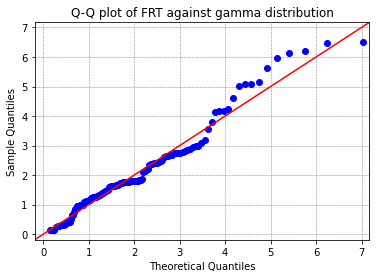

In [ ]:
sm.qqplot(FRT['Price'], line='45', fit = True, dist = stats.gamma)
plt.title("Q-Q plot of FRT against gamma distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

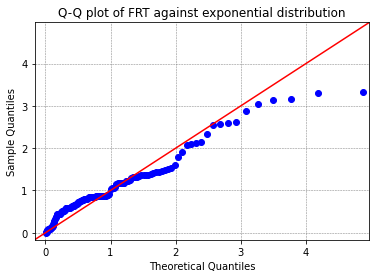

In [ ]:
sm.qqplot(FRT['Price'], line='45', fit = True, dist = stats.expon)
plt.title("Q-Q plot of FRT against exponential distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

Throughout the plotting stage, gamma distribution is adopted to be the most fitted with this FRT stock's index.

**VRC**

Text(0.5, 1.0, 'The histogram and KDE of VRC')

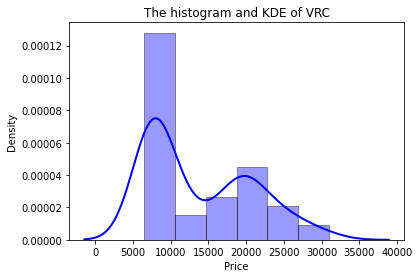

In [ ]:
sns.distplot(VRC['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of VRC")

As the process above, the histogram and KDE line of VRC stock's index provided us with the fact that the shape of KDE line is not special. As a granted consequence, this stock does not follow any well-known distribution.

In [ ]:
# pg.normality(VRC['Price'])

In [ ]:
# sm.qqplot(VRC['Price'], line='45', fit = True)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

In [ ]:
# sm.qqplot(VRC['Price'], line='45', fit = True, dist = stats.gamma)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

## **Stocks of three different sectors**

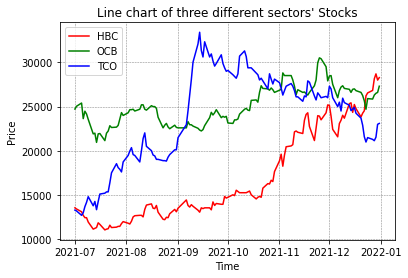

In [ ]:
plt.title("Line chart of three different sectors' Stocks")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.plot(HBC['Price'], color = 'red', label = 'HBC')
plt.plot(OCB['Price'], color = 'green', label = 'OCB')
plt.plot(TCO['Price'], color = 'blue', label = 'TCO')
plt.legend()
plt.show()

Above is a line chart that shows indexs of HBC, OCB, TCO stock within the lines colored red, green, blue respectively in the period between 07/2021 and 12/2021. Overally, all three had witnessed many fluctuations. Had been starting at the same index of around 1350 in 01-07-2021, HBC followed a complete uptrend throughout the period whereas TCO peaked at approximatedly 3200 before droping until the end. Meanwhile, OCB stock started from 2500 and fluctuated marginal in a shape of a sinusoidal curve. Althought starting points, ways or amplitude of changes, all three stock index stopped around 2500 by the end of december, this seemed to be the Market Saturation of sectors in the stock market as those three stocks are from different sectors.

**HBC**

Text(0.5, 1.0, 'The histogram and KDE of HBC')

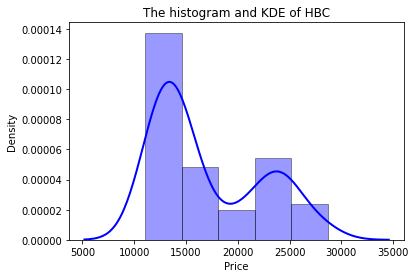

In [ ]:
sns.distplot(HBC['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of HBC")

As above experience, the histogram within KDE line of this HBC stock index illustrates that this stock does not follow any well-known distribution.

In [ ]:
# pg.normality(HBC['Price'])

In [ ]:
# sm.qqplot(HBC['Price'], line='45', fit = True)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

**OCB**

Text(0.5, 1.0, 'The histogram and KDE of OCB')

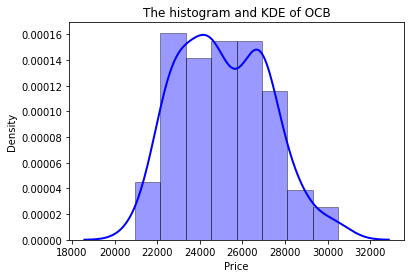

In [ ]:
sns.distplot(OCB['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of OCB")

The KDE line from this histogram within KDE line of OCB stock's index above is marginally a typical bell curve within a slightly equal middle part, we are of two minds between normal distribution and uniform distribution which fitted it. Therefore, we draw Q-Q plots as below.

In [ ]:
# pg.normality(OCB['Price'])

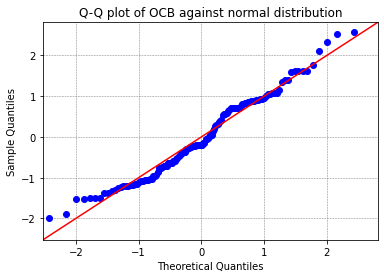

In [ ]:
sm.qqplot(OCB['Price'], line='45', fit = True)
# sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
plt.title("Q-Q plot of OCB against normal distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

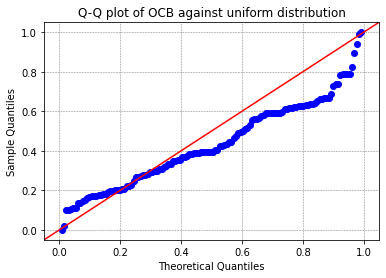

In [ ]:
sm.qqplot(OCB['Price'], line='45', fit = True, dist=stats.uniform)
plt.title("Q-Q plot of OCB against uniform distribution")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

From two Q-Q plots above of testing whether normal distribution or uniform distribution respectively fits OCB stock's index, we can conclude that normal distribution is more fitted.

**TCO**

Text(0.5, 1.0, 'The histogram and KDE of TCO')

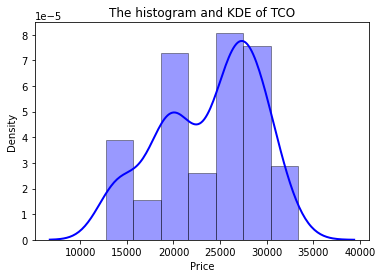

In [ ]:
sns.distplot(TCO['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of TCO")

As above experience, the histogram within KDE line of TCO stock index shows that this stock does not follow any well-known distribution.

In [ ]:
# pg.normality(TCO['Price'])

In [ ]:
# sm.qqplot(TCO['Price'], line='45', fit = True)
# # sm.qqplot(APH['Price'], loc = 20, scale = 5 ,  line='45')
# plt.show()

## **VNI**

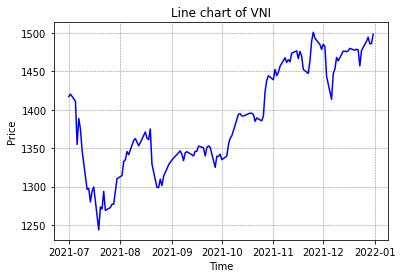

In [ ]:
plt.title("Line chart of VNI")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.plot(VNI['Price'], color = 'blue')
plt.show()

The line chart above shows VNI's index of price throughout a period of time, this index witness a considerable rise among some peaks, fluctuations in the middle.

Text(0.5, 1.0, 'The histogram and KDE of VNI')

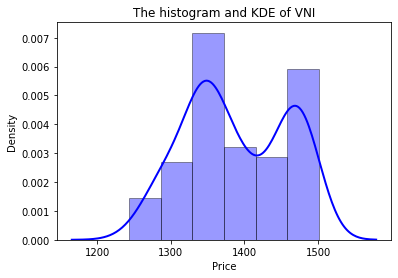

In [ ]:
sns.distplot(VNI['Price'], 
             hist = True, 
             kde = True,
             color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2}
)
plt.title("The histogram and KDE of VNI")

We are graphing above a histogram combined with a KDE line to demonstrate the frequency of price of VNI stock. Since the KDE line does not have any considerably special shape, this index turns out not to follow any well-known distribution.